In [6]:
from ROOT import TFile,TTree,TCanvas,TH1F, gStyle, TLatex, gPad, TLegend, TLorentzVector, TH2F, TLine, TF1, TBox, RDataFrame, TPad, TF2, TStyle, THStack
import ROOT
import numpy as np
import awkward as awk
import uproot as up
import pandas as pd
import os

$k_i = k_f - q$

In [7]:
MC = RDataFrame("tree_MC", "/w/hallb-scshelf2102/clas12/users/rojokell/MCLundAnalysis/OutputFiles/Slurm_Spring_24/July_08/Testing/file_*.root")
driver = RDataFrame("tree_driver", "/w/hallb-scshelf2102/clas12/users/rojokell/MCLundAnalysis/Analysis/BoxAffinity/root_files/July_8_100_driver_old_R2_three_files.root")

In [9]:
MC_file_dir = "/w/hallb-scshelf2102/clas12/users/rojokell/MCLundAnalysis/OutputFiles/Slurm_Spring_24/July_08/Testing/"
tree_MC_list = []
for name in os.listdir(MC_file_dir):
    tree_MC_list.append(up.open(MC_file_dir + name + ":tree_maxmin"))
tree_driver = up.open("/w/hallb-scshelf2102/clas12/users/rojokell/MCLundAnalysis/Analysis/BoxAffinity/root_files/July_8_100_driver_old_R2_three_files.root:tree_max")

In [10]:
for i in range(len(tree_MC_list)):
    tree_MC = tree_MC_list[i]
    if(i == 0):
        MC_R0_hist_max = tree_MC["R0_max"].array(library='np')[0]
        MC_R1_hist_max = tree_MC["R1_max"].array(library='np')[0]
        MC_R2_hist_max = tree_MC["R2_max"].array(library='np')[0]

        MC_R0_hist_min = tree_MC["R0_min"].array(library='np')[0]
        MC_R1_hist_min = tree_MC["R1_min"].array(library='np')[0]
        MC_R2_hist_min = tree_MC["R2_min"].array(library='np')[0]
    else:
        MC_R0_hist_max = max(MC_R0_hist_max,tree_MC["R0_max"].array(library='np')[0])
        MC_R1_hist_max = max(MC_R1_hist_max,tree_MC["R1_max"].array(library='np')[0])
        MC_R2_hist_max = max(MC_R2_hist_max,tree_MC["R2_max"].array(library='np')[0])

        MC_R0_hist_min = min(MC_R0_hist_min,tree_MC["R0_min"].array(library='np')[0])
        MC_R1_hist_min = min(MC_R1_hist_min,tree_MC["R1_min"].array(library='np')[0])
        MC_R2_hist_min = min(MC_R2_hist_min,tree_MC["R2_min"].array(library='np')[0])
driver_R0_hist_max = tree_driver["R0_hist_max"].array(library='np')[0]
driver_R1_hist_max = tree_driver["R1_hist_max"].array(library='np')[0]
driver_R2_hist_max = tree_driver["R2_hist_max"].array(library='np')[0]

driver_R0_hist_min = tree_driver["R0_hist_min"].array(library='np')[0]
driver_R1_hist_min = tree_driver["R1_hist_min"].array(library='np')[0]
driver_R2_hist_min = tree_driver["R2_hist_min"].array(library='np')[0]



In [11]:
nBins_MC = 1000
nBins_MC_R1 = 10000000
# Calculate common bin width
binWidth_R0 = MC_R0_hist_max / nBins_MC
binWidth_R1 = MC_R1_hist_max / nBins_MC_R1
binWidth_R2 = MC_R2_hist_max / nBins_MC

nBins_driver_R0 = int(driver_R0_hist_max // binWidth_R0)
nBins_driver_R1 = int(driver_R1_hist_max // binWidth_R1)
nBins_driver_R2 = int(driver_R2_hist_max // binWidth_R2)

In [12]:
MC_R1_hist_min

-182019.23195209034

## Particular bins

### Bin 0: high TMD aff
### Bin 1: low TMD aff

In [13]:
histo_name = ["high TMD aff bin", "low TMD aff bin"]

x_bins = [0.1, 0.06]
Q2_bins = [3.5, 1.77]
z_bins = [0.725, 0.75]
pT_bins = [0.0225, 1.01]
expected_TMD_aff = [0.5525, 0.005]

x_tol = 0.1
z_tol = 0.1
pT_tol = 0.1
Q2_tol = 1
driver_format = "x.x_t <= {} && x.x_t > {} && z.z_t <= {} && z.z_t > {} && pT.pT_t <= {} && pT.pT_t > {} && Q2.Q2_t <= {} && Q2.Q2_t > {}"
MC_format = "x <= {} && x > {} && z <= {} && z > {} && pT <= {} && pT > {} && Q2 <= {} && Q2 > {}"

In [14]:
nBins_driver_R0_binned = int(np.floor(nBins_driver_R0 / 10)) 
nBins_driver_R1_binned = int(np.floor(nBins_driver_R1 / 10)) 
nBins_driver_R2_binned = int(np.floor(nBins_driver_R2 / 10)) 

nBins_MC_binned = int(np.floor(nBins_MC / 10)) 
nBins_MC_R1_binned = int(np.floor(nBins_MC_R1 / 10)) 

Error in <THashList::Delete>: A list is accessing an object (0x55bf9a090010) already deleted (list name = THashList)
Error in <THashList::Delete>: A list is accessing an object (0x55bfa3320130) already deleted (list name = THashList)
Error in <THashList::Delete>: A list is accessing an object (0x55bfa316ab10) already deleted (list name = THashList)
Error in <THashList::Delete>: A list is accessing an object (0x55bfa2b15960) already deleted (list name = THashList)
Error in <THashList::Delete>: A list is accessing an object (0x55bfa2b93180) already deleted (list name = THashList)
Error in <THashList::Delete>: A list is accessing an object (0x55bfb12a7550) already deleted (list name = THashList)


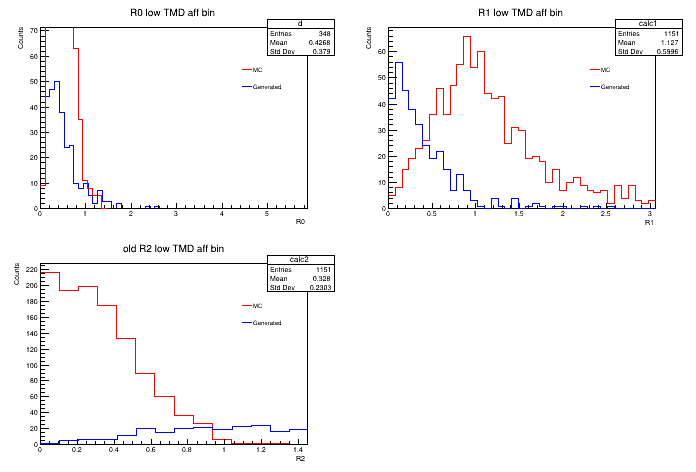

In [17]:
driver_frames = []
MC_frames = []
for i in range(2):
    driver_binned = driver.Filter(driver_format.format((x_bins[i] + x_tol),(x_bins[i] - x_tol),(z_bins[i] + z_tol),(z_bins[i] - z_tol),(pT_bins[i] + pT_tol),(pT_bins[i] - pT_tol),(Q2_bins[i] + Q2_tol),(Q2_bins[i] - Q2_tol)))
    MC_binned = MC.Filter(MC_format.format((x_bins[i] + x_tol),(x_bins[i] - x_tol),(z_bins[i] + z_tol),(z_bins[i] - z_tol),(pT_bins[i] + pT_tol),(pT_bins[i] - pT_tol),(Q2_bins[i] + Q2_tol),(Q2_bins[i] - Q2_tol)))

    # Define histograms with common bin width
    d = driver_binned.Histo1D(("d", f"R0 {histo_name[i]} ;R0 ;Counts", nBins_driver_R0_binned, 0, driver_R0_hist_max), "R0.R0_t")
    d1 = driver_binned.Histo1D(("d1",f"R1 {histo_name[i]} ;R1 ;Counts",nBins_driver_R1_binned,0,driver_R1_hist_max),"R1.R1_t")
    d2 = driver_binned.Histo1D(("d2",f"old R2 {histo_name[i]} ;R2 ;Counts",nBins_driver_R2_binned,0,driver_R2_hist_max),"R2.R2_t")


    calc = MC_binned.Histo1D(("calc", f"R0 {histo_name[i]} ;R0 ;Counts", nBins_MC_binned, 0, MC_R0_hist_max), "R0")
    calc1 = MC_binned.Histo1D(("calc1",f"R1 {histo_name[i]} ;R1 ;Counts",nBins_MC_R1_binned,0,MC_R1_hist_max),"R1")
    calc2 = MC_binned.Histo1D(("calc2",f"old R2 {histo_name[i]};R2 ;Counts",nBins_MC_binned,0,MC_R2_hist_max),"R2")

    calc_dum = TH1F("","",1,0,1);
    calc_dum.SetLineColor(2);
    d_dum = TH1F("","",1,0,1);
    d_dum.SetLineColor(4);
    calc.SetLineColor(2)
    d.SetLineColor(4)
    calc1.SetLineColor(2)
    d1.SetLineColor(4)
    calc2.SetLineColor(2)
    d2.SetLineColor(4)

    legend = ROOT.TLegend (0.7 ,0.6 ,0.85 ,0.75)
    legend.AddEntry(calc_dum, "MC" ,"l")
    legend.AddEntry(d_dum, "Generated","l" )
    legend.SetLineWidth(0)

    calc.GetXaxis().SetRangeUser(0,1.4)
    calc1.GetXaxis().SetRangeUser(0,3)
    calc2.GetXaxis().SetRangeUser(0,1.4)
    d1.GetXaxis().SetRangeUser(0,3)

    c = TCanvas("c","c")
    c.Divide(2,2)
    c.cd(1)
    d.Draw("histo")
    calc.Draw("same")
    legend.Draw("same")
    c.cd(2)

    calc1.Draw("histo")
    d1.Draw("same")

    legend.Draw("same")
    c.cd(3)
    calc2.Draw("histo")
    d2.Draw("same")
    legend.Draw("same")
    c.Draw()
    c.Print(f"./Histos/Ratios/oldR2_three_files_bin{i}.pdf")

total events: 923733